In [1520]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1521]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import keras
import matplotlib.pyplot as plt
from keras.layers import Dense,GlobalAveragePooling2D
from tensorflow.keras.applications.mobilenet import MobileNet
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from glob import glob
import os
from keras.layers import Input, Conv2D, MaxPooling2D, AveragePooling2D

In [1522]:

# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Colab Notebooks/FINAL DATA/Train'
valid_path = '/content/drive/MyDrive/Colab Notebooks/FINAL DATA/Test'

In [1523]:
train_mali_fnames = os.listdir('/content/drive/MyDrive/Colab Notebooks/FINAL DATA/Test/Benign cases')
print(train_mali_fnames[:10])

train_ben_fnames = os.listdir('/content/drive/MyDrive/Colab Notebooks/FINAL DATA/Test/Malignant cases')
train_ben_fnames.sort()
print(train_ben_fnames[:10])

train_normal_fnames = os.listdir('/content/drive/MyDrive/Colab Notebooks/FINAL DATA/Test/Normal cases')
train_ben_fnames.sort()
print(train_ben_fnames[:10])

['Bengin case (10).jpg', 'Bengin case (1).jpg', 'Bengin case (118).jpg', 'Bengin case (119).jpg', 'Bengin case (2).jpg', 'Bengin case (14).jpg', 'Bengin case (115).jpg', 'Bengin case (12).jpg', 'Bengin case (15).jpg', 'Bengin case (120).jpg']
['Malignant case (1).jpg', 'Malignant case (10).jpg', 'Malignant case (11).jpg', 'Malignant case (12).jpg', 'Malignant case (13).jpg', 'Malignant case (14).jpg', 'Malignant case (15).jpg', 'Malignant case (16).jpg', 'Malignant case (2).jpg', 'Malignant case (3).jpg']
['Malignant case (1).jpg', 'Malignant case (10).jpg', 'Malignant case (11).jpg', 'Malignant case (12).jpg', 'Malignant case (13).jpg', 'Malignant case (14).jpg', 'Malignant case (15).jpg', 'Malignant case (16).jpg', 'Malignant case (2).jpg', 'Malignant case (3).jpg']


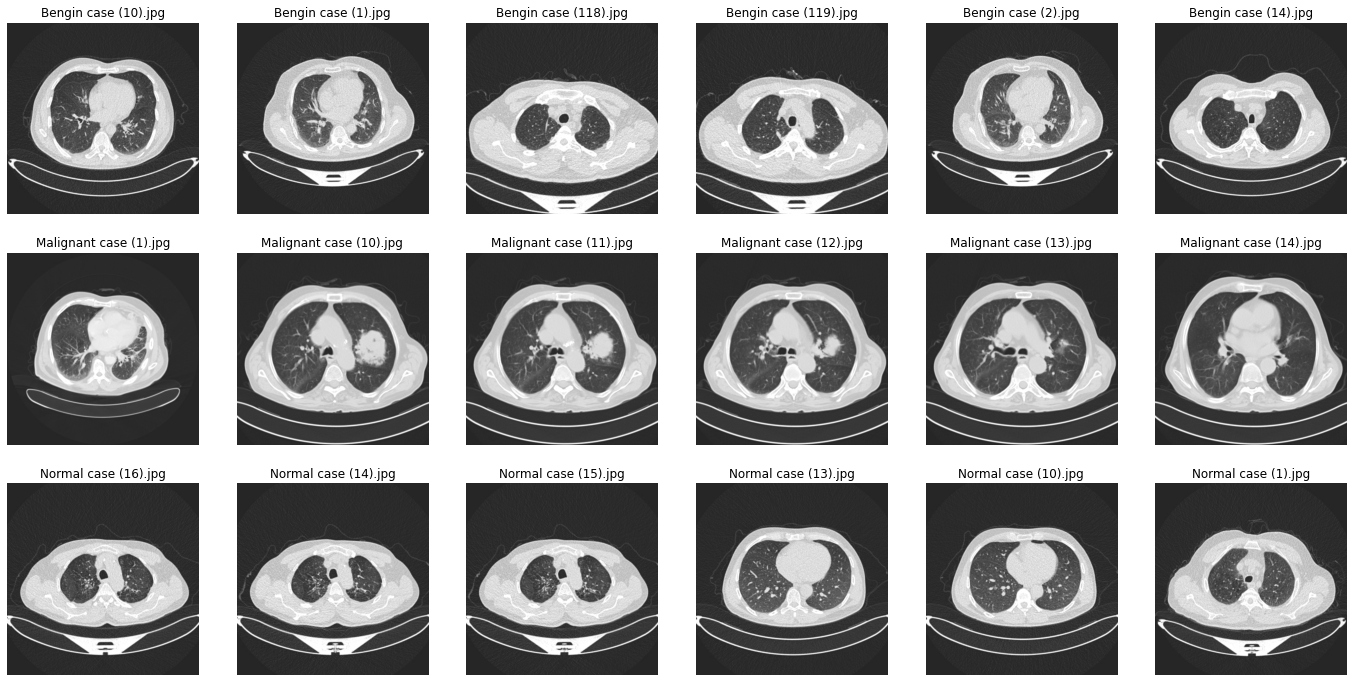

In [1524]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#4x4 configuration
nrows =3
ncols = 6
pic_index = 0




fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 6
bengin_pix = [os.path.join('/content/drive/MyDrive/Colab Notebooks/FINAL DATA/Test/Benign cases/', fname) 
                for fname in train_mali_fnames[pic_index-6:pic_index]]
malignant_pix = [os.path.join('/content/drive/MyDrive/Colab Notebooks/FINAL DATA/Test/Malignant cases/', fname) 
                for fname in train_ben_fnames[pic_index-6:pic_index]]
normal_pix = [os.path.join('/content/drive/MyDrive/Colab Notebooks/FINAL DATA/Test/Normal cases/', fname) 
                for fname in train_normal_fnames[pic_index-6:pic_index]]


for i, img_path in enumerate(bengin_pix+malignant_pix+normal_pix):
 
  sp = plt.subplot(nrows, ncols, i + 1)  # Set up subplot
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.title(img_path.split("/")[-1])
  
    
plt.show()

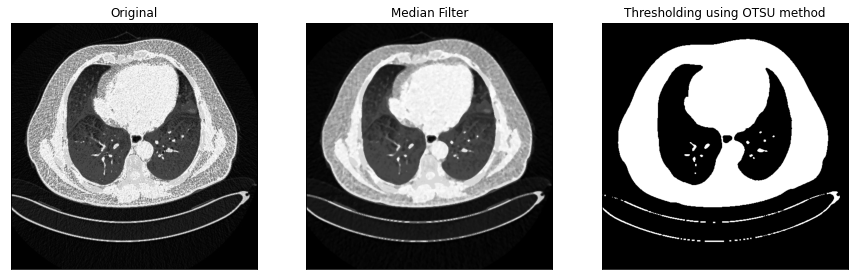

In [1525]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from PIL import Image, ImageFilter
%matplotlib inline

image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/FINAL DATA/Train/Benign cases/Bengin case (25).jpg')

image2 = cv2.cvtColor(image, cv2.COLOR_HSV2BGR)
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
figure_size = 5




new_image = cv2.medianBlur(image2, figure_size)

otsu_threshold, image_result = cv2.threshold(new_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU,)

plt.figure(figsize=(15,15))
plt.subplot(131), plt.imshow(image2, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(new_image, cmap='gray'),plt.title('Median Filter')
plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(image_result, cmap='gray'),plt.title('Thresholding using OTSU method')
plt.xticks([]), plt.yticks([])
plt.show()

In [1526]:
# figure_size = 9 # the dimension of the x and y axis of the kernal.

# new_image_gauss = cv2.GaussianBlur(image, (figure_size, figure_size),0)

# new_image_median = cv2.medianBlur(image, figure_size)

# plt.figure(figsize=(15,15))
# plt.subplot(131), plt.imshow(image, cmap='gray'),plt.title('Original')
# plt.xticks([]), plt.yticks([])
# plt.subplot(132), plt.imshow(new_image_gauss, cmap='gray'),plt.title('Median Filter')
# plt.xticks([]), plt.yticks([])
# plt.subplot(133), plt.imshow(new_image_median, cmap='gray'),plt.title('Median Filter')

In [1527]:
# lst=['Train','Test']
# for j in lst:
#     folder=['Benign cases','Malignant cases','Normal cases']

#     for i in folder:
#         # Replace mydir with the directory you want
#         mydir = '/content/drive/MyDrive/Colab Notebooks/Preprocessed DATA/'+j+'/'+i
#         #orginal path
#         path='/content/drive/MyDrive/Colab Notebooks/FINAL DATA/'+j+'/'+i

#         #check if directory exist, if not create it
#         try:
#             os.makedirs(mydir)
#         except:
#             print ("Directory already exist, images will be written in same folder")
#         files = os.listdir(path)
#         for fil in files:
#             image=cv2.imread(os.path.join(path,fil))
#             # image2 = cv2.cvtColor(image, cv2.COLOR_HSV2BGR)
#             # image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

#             figure_size = 9



#             new_image_gauss = cv2.GaussianBlur(image, (figure_size, figure_size),0)
#             # otsu_threshold, image_result = cv2.threshold(new_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU,)
#             cv2.imwrite(os.path.join(mydir,fil),new_image_gauss) 


In [1528]:
# useful for getting number of output classes
folders = glob('/content/drive/MyDrive/Colab Notebooks/Preprocessed DATA/Train/*')

In [1529]:
from keras.applications.mobilenet import MobileNet
from keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten, BatchNormalization
from keras.models import Sequential

base_model=MobileNet( weights='imagenet',include_top=False,input_shape=(224,224,3)) #imports the mobilenet model and discards the last 1000 neuron layer.

In [1530]:
x=base_model.output
x=AveragePooling2D()(x)
x = Flatten()(x)
x = Dropout(0.4)(x)
x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(1024,activation='relu')(x) #dense layer 2
x=Dense(512,activation='relu')(x) #dense layer 3



preds=Dense(3,activation='softmax')(x) #final layer with softmax activation

In [1531]:
model=Model(inputs=base_model.input,outputs=preds)
for layer in model.layers[:20]:
    layer.trainable=False
for layer in model.layers[20:]:
    layer.trainable=True


In [1532]:

from keras.callbacks import  EarlyStopping
import tensorflow as tf
Adam=tf.keras.optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=1e-5, amsgrad=False)
es = EarlyStopping(patience=5)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [1533]:
model.compile(optimizer=Adam,loss='categorical_crossentropy',metrics=['accuracy'])
# Adam optimizer
# loss function will be categorical cross entropy
# evaluation metric will be accuracy
model.summary()

Model: "model_46"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_56 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                   

In [1534]:
# Use the Image Data Generator to import the images from the dataset
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [1535]:
# Make sure you provide the same target size as initialied for the image size
#Preprocessed DATA

training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Preprocessed DATA/Train',
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=30,
                                                 class_mode='categorical',
                                                 shuffle=True)

Found 1029 images belonging to 3 classes.


In [1536]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Preprocessed DATA/Test',
                                            target_size=(224,224),
                                                color_mode='rgb',
                                                 batch_size=30,
                                                 class_mode='categorical',
                                                 shuffle=True)

Found 68 images belonging to 3 classes.


In [1537]:
# step_size_train=training_set.n//training_set.batch_size
# step_size_test=test_set.n//test_set.batch_size

In [1538]:
# history=model.fit_generator(generator=training_set,steps_per_epoch=step_size_train,
#                             validation_data=test_set,validation_steps=step_size_test,callbacks=[es],epochs=15)

In [ ]:
from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 10, 
                                        restore_best_weights = True)

r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=100,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set),callbacks =[earlystopping]
)

Epoch 1/100
35/35 [==============================] - 14s 299ms/step - loss: 0.4941 - accuracy: 0.8222 - val_loss: 1.3007 - val_accuracy: 0.5735
Epoch 2/100
35/35 [==============================] - 9s 266ms/step - loss: 0.0862 - accuracy: 0.9679 - val_loss: 0.6455 - val_accuracy: 0.7353
Epoch 3/100
35/35 [==============================] - 9s 269ms/step - loss: 0.0246 - accuracy: 0.9942 - val_loss: 0.6281 - val_accuracy: 0.7353
Epoch 4/100
35/35 [==============================] - 9s 266ms/step - loss: 0.0091 - accuracy: 0.9981 - val_loss: 0.5198 - val_accuracy: 0.8088
Epoch 5/100
35/35 [==============================] - 9s 264ms/step - loss: 0.0067 - accuracy: 0.9971 - val_loss: 0.5217 - val_accuracy: 0.8382
Epoch 6/100
35/35 [==============================] - 9s 261ms/step - loss: 0.0121 - accuracy: 0.9961 - val_loss: 0.7100 - val_accuracy: 0.8088
Epoch 7/100
31/35 [=========================>....] - ETA: 0s - loss: 0.0053 - accuracy: 0.9989

In [ ]:

score=model.evaluate(test_set,verbose = 0) 
print('Validation Accuracy:', score)

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# import tensorflow as tf
# tf.keras.models.save_model(model,'mobilenet_97_model.hdf5')

In [ ]:
class_dict = training_set.class_indices
print(class_dict)

In [ ]:
li = list(class_dict.keys())
class_names=li
print(li)

In [ ]:
#val accuracy
score  = model.evaluate_generator(test_set, steps=len(test_set), verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
predgen = model.predict_generator(test_set, steps=len(test_set), verbose=1) 
pred = np.argmax(predgen,axis = 1)
y_true=test_set.classes

In [ ]:
#confution matrix

from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_true, pred)
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()

In [ ]:
# example of using a pre-trained model as a classifier
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16




In [ ]:
image = load_img('/content/drive/MyDrive/Colab Notebooks/FINAL DATA/Malignant case (1).jpg', target_size=(224, 224))

plt.imshow(image)
plt.show()

img = image.resize((224,224))
img = np.array(img)
img = img / 255.0
img = img.reshape(1,224,224,3)


prediction = model.predict(img)
score = tf.nn.softmax(prediction[0])
print(class_names[np.argmax(score)])

In [ ]:
image = load_img('/content/drive/MyDrive/Colab Notebooks/FINAL DATA/Malignant case (1).jpg', target_size=(224, 224))

plt.imshow(image)
plt.show()

size = (224,224)    
image = ImageOps.fit(image, size, Image.ANTIALIAS)
img = np.array(img)
img = img / 255.0
image = np.asarray(image)

img_reshape = image[np.newaxis,...]


prediction = model.predict(img_reshape)
score = tf.nn.softmax(prediction[0])
print(class_names[np.argmax(score)])

In [ ]:
!pip install coremltools

In [ ]:
from PIL import Image, ImageOps
img = Image.open('/content/drive/MyDrive/Colab Notebooks/FINAL DATA/Malignant case (1).jpg')
threshold = 254
gray_image = ImageOps.grayscale(img)
gray = gray_image.convert('1')
image_file = gray.point( lambda p: 255 if p > threshold else 0 )

plt.imshow(image_file)
plt.show()

size = (224,224)    
image = ImageOps.fit(image_file, size, Image.ANTIALIAS)
image = np.asarray(image)

img_reshape = image[np.newaxis,...]

prediction = model.predict(image)


score = tf.nn.softmax(model.predict(img_reshape)[0])
pr=class_names[np.argmax(score)]
print(pr)

In [ ]:
from PIL import Image, ImageOps
img = Image.open('/content/drive/MyDrive/Colab Notebooks/FINAL DATA/Malignant case (1).jpg')

size = (224,224)    
image = ImageOps.fit(img, size, Image.ANTIALIAS)
image = np.asarray(image)
img = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
img_reshape = img[np.newaxis,...]
prediction = model.predict(img_reshape)



In [ ]:
score = tf.nn.softmax(model.predict(img_reshape)[0])
pr=class_names[np.argmax(score)]
print(pr)